In [259]:
import matplotlib.pyplot as pylot
import pandas
import numpy

In [260]:
data = [75, 72, 68, 65, 67, 73]
data

[75, 72, 68, 65, 67, 73]

Mean

In [261]:
mean_math = numpy.sum(data) / len(data)
print(mean_math)

mean = numpy.mean(data)
mean

70.0


70.0

Median

In [262]:
median_result = numpy.sort(data)
median_result = (median_result[2] + median_result[3]) / 2
print(median_result)

median = numpy.median(data)
median

70.0


70.0

Mean Absolute Deviation ( MAD )

In [263]:
average = numpy.mean(data)
mean_average = []

for i in data:
    mean_average.append(i - average)

mean_average

[5.0, 2.0, -2.0, -5.0, -3.0, 3.0]

Standard Deviation

In [264]:
average = numpy.mean(data)
mean_average = []

for i in data:
    mean_average.append((i - average) * i)

mean = numpy.mean(mean_average)
sqrt = numpy.sqrt(numpy.mean(mean_average))
print(f"Mean: {mean}")
print(f"STD: {sqrt}")
numpy.std(data)

Mean: 12.666666666666666
STD: 3.559026084010437


3.559026084010437

### Normal Distribution

In [265]:
df = pandas.read_csv('./data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [266]:
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

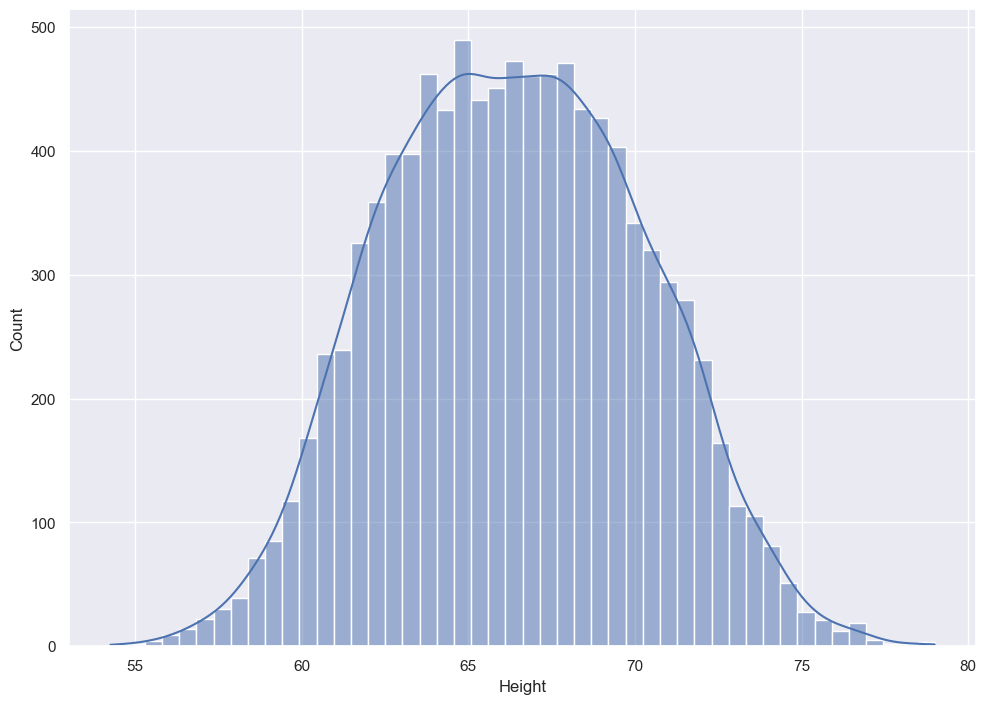

In [267]:
import seaborn

seaborn.histplot(df["Height"], kde=True)

### Standard Deviation

In [268]:
mean = df["Height"].mean()
mean

66.36755975482124

In [269]:
standard_deviation = df["Height"].std()
standard_deviation

3.8475281207732293

In [270]:
right_outlier = mean + 3 * standard_deviation
right_outlier

77.91014411714093

In [271]:
left_outlier = mean - 3 * standard_deviation
left_outlier

54.82497539250156

In [272]:
df[(df["Height"] < left_outlier) | (df["Height"] > right_outlier)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [273]:
df_no_outlier = df[(df["Height"] < left_outlier) & (df["Height"] > right_outlier)]
df_no_outlier.shape

(0, 3)

### Z-Score

In [274]:
df["Zscore"] = (df["Height"] - df["Height"].mean()) / df["Height"].std()
df.head()

,Gender,Height,Weight,Zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [275]:
height_std = 3.84733573955754
height_mean = 66.36755975482124
height = 73.847017

(height - height_mean) / height_std

1.9440614886495244

In [276]:
df[(df["Zscore"] < -3) | (df["Zscore"] > 3)]

,Gender,Height,Weight,Zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [277]:
df_no_outlier = df[(df["Zscore"] > -3) & (df["Zscore"] < 3)]
df_no_outlier.shape

(9993, 4)

Exercise

In [278]:
df = pandas.read_csv('./data/bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [279]:
df["price_per_sqft"].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

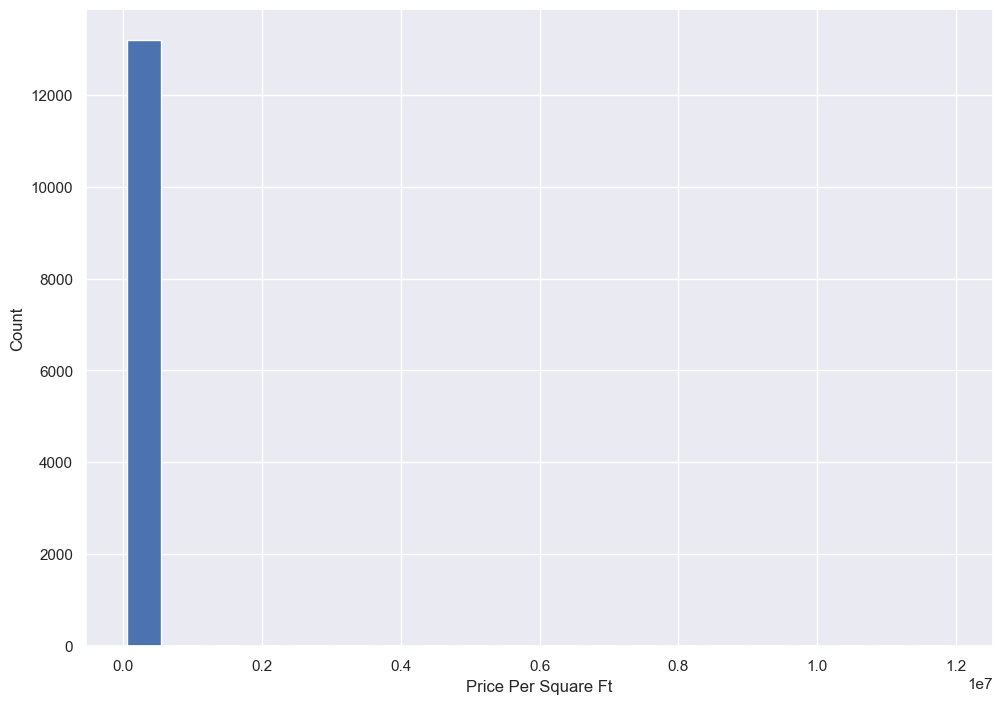

In [280]:
pylot.hist(df["price_per_sqft"], bins=20, rwidth=0.8)

pylot.xlabel("Price Per Square Ft")
pylot.ylabel("Count")

pylot.show()

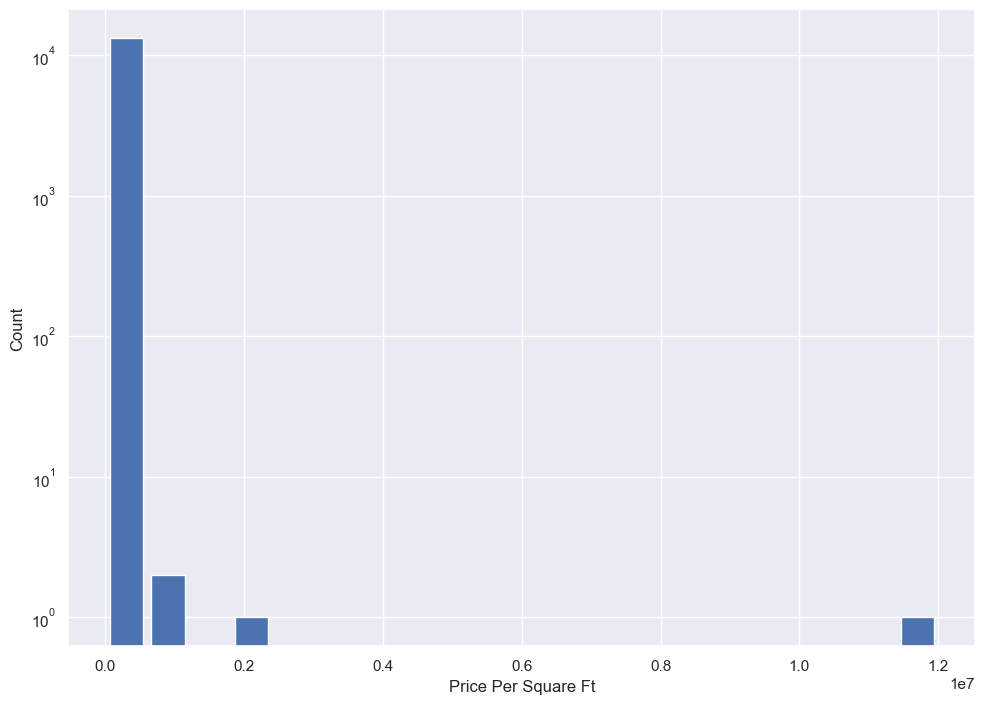

In [281]:
pylot.hist(df['price_per_sqft'], bins=20, rwidth=0.8)

pylot.xlabel("Price Per Square Ft")
pylot.ylabel("Count")
pylot.yscale("log")

pylot.show()

In [282]:
lower_limit, upper_limit = df["price_per_sqft"].quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [283]:
outliers = df[(df["price_per_sqft"] > upper_limit) | (df["price_per_sqft"] < lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
7012,other,1 BHK,650.0,1.0,500.0,1,76923
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573


In [284]:
df2 = df[(df["price_per_sqft"] < upper_limit) & (df["price_per_sqft"] > lower_limit)]
df2.shape

(13172, 7)

In [285]:
df.shape

(13200, 7)

In [286]:
df.shape[0] - df2.shape[0]

28

In [287]:
max_limit = df2["price_per_sqft"].mean() + 4 * df2["price_per_sqft"].std()
min_limit = df2["price_per_sqft"].mean() - 4 * df2["price_per_sqft"].std()
max_limit, min_limit

(23227.73653589432, -9900.429065502582)

In [288]:
df2[(df2["price_per_sqft"] > max_limit) | (df2["price_per_sqft"] < min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9873,other,3 Bedroom,2400.0,6.0,775.0,3,32291
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
4400,other,8 Bedroom,750.0,8.0,200.0,8,26666
1659,Whitefield,5 Bedroom,3250.0,5.0,900.0,5,27692
9907,other,8 Bedroom,600.0,4.0,175.0,8,29166
8483,HSR Layout,8 Bedroom,800.0,8.0,285.0,8,35625
9853,Indira Nagar,5 Bedroom,2400.0,5.0,700.0,5,29166
12095,other,7 Bedroom,2240.0,4.0,700.0,7,31250
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
4638,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43,27500


In [289]:
df3 = df2[(df2["price_per_sqft"] > min_limit) & (df2["price_per_sqft"] < max_limit)]
df3.shape

(13047, 7)

In [290]:
df2.shape[0] - df3.shape[0]

125

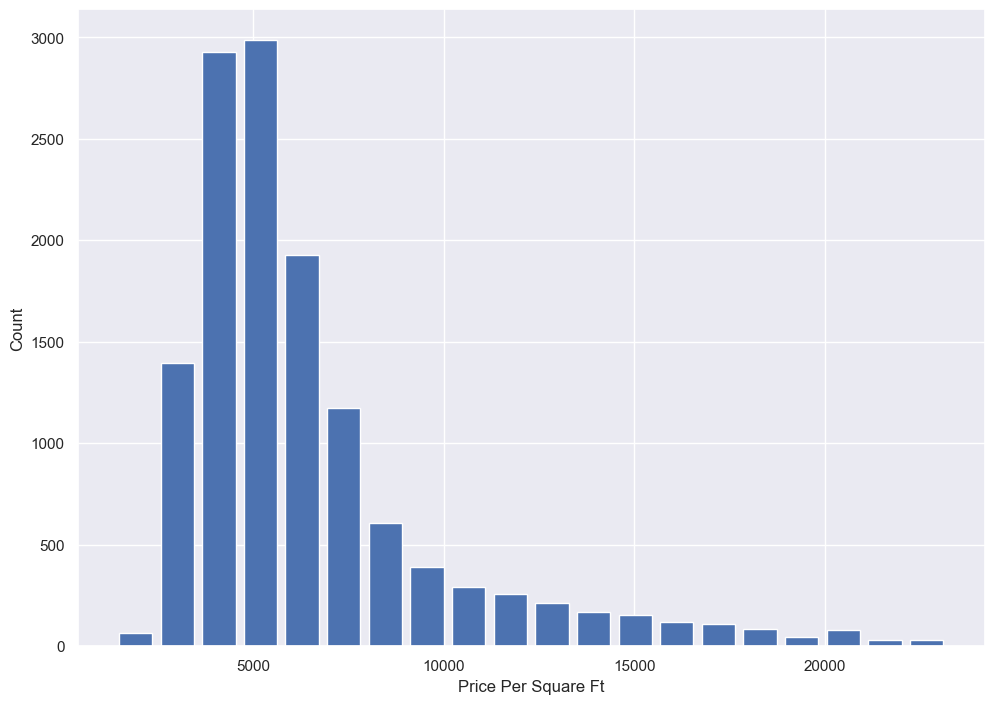

In [291]:
pylot.hist(df3["price_per_sqft"], bins=20, rwidth=0.8)

pylot.xlabel("Price Per Square Ft")
pylot.ylabel("Count")

pylot.show()

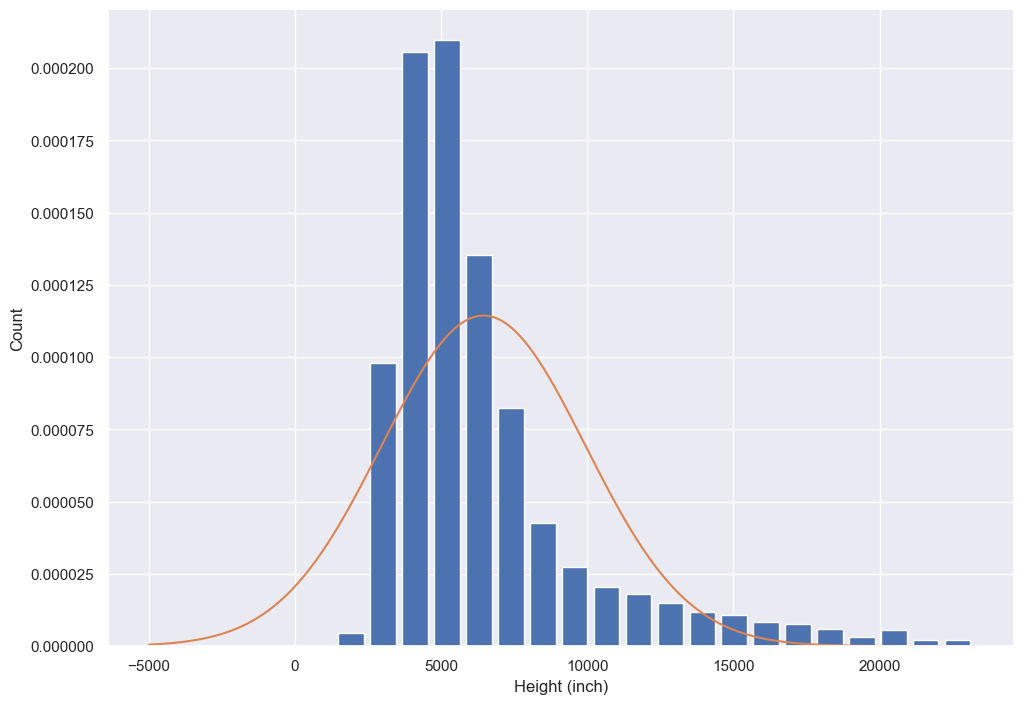

In [292]:
from scipy.stats import norm
import numpy

pylot.hist(df3["price_per_sqft"], bins=20, rwidth=0.8, density=True)

pylot.xlabel("Height (inch)")
pylot.ylabel("Count")

rng = numpy.arange(-5000, df3["price_per_sqft"].max(), 100)
pylot.plot(rng, norm.pdf(rng, df3["price_per_sqft"].mean(), df3["price_per_sqft"].std()))

pylot.show()

In [293]:
df2["Zscore"] = (df2["price_per_sqft"] - df2["price_per_sqft"].mean()) / df2["price_per_sqft"].std()
df2.sample(10)

C:\Users\User\AppData\Local\Temp\ipykernel_11208\3592150988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Zscore"] = (df2["price_per_sqft"] - df2["price_per_sqft"].mean()) / df2["price_per_sqft"].std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
181,Vijayanagar,3 BHK,1704.0,3.0,110.0,3,6455,-0.050387
2610,other,2 BHK,1170.0,2.0,68.0,2,5811,-0.205904
3730,Margondanahalli,2 Bedroom,1000.0,2.0,57.0,2,5700,-0.232709
2641,Harlur,3 BHK,1754.0,3.0,124.0,3,7069,0.097886
11002,Kanakpura Road,3 BHK,1452.0,3.0,56.5,3,3891,-0.669558
5693,Ardendale,2 BHK,1224.0,2.0,70.0,2,5718,-0.228362
658,other,2 BHK,1630.0,2.0,200.0,2,12269,1.353615
8354,Kanakpura Road,3 BHK,1703.0,3.0,130.0,3,7633,0.234084
9472,other,2 BHK,900.0,2.0,24.0,2,2666,-0.965379
10909,other,4 Bedroom,600.0,4.0,65.0,4,10833,1.006840


In [294]:
outliers_z = df2[(df2["price_per_sqft"] < -4) | (df2["price_per_sqft"] > 4)]
outliers_z.shape

(13172, 8)

In [295]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
7835,other,1 BHK,600.0,1.0,18.0,1,3000,-0.884722
2025,R.T. Nagar,3 BHK,1560.0,3.0,85.0,3,5448,-0.293564
6305,Sarjapur Road,2 BHK,1115.0,2.0,50.0,2,4484,-0.526357
10278,other,3 BHK,2030.0,2.0,182.0,3,8965,0.555744
10291,Raja Rajeshwari Nagar,2 BHK,1419.0,2.0,48.1,2,3389,-0.790784


In [296]:
df4 = df2[(df2["Zscore"] > -4) & (df2["Zscore"] < 4)]
df4.shape

(13047, 8)

In [297]:
df2.shape[0] - df4.shape[0]

125

### Logarithm

In [298]:
df = pandas.read_csv('./data/revenue.csv')
df

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jindal Steel,4.7
4,Axis Bank,5.6
5,Vedanta,11.3


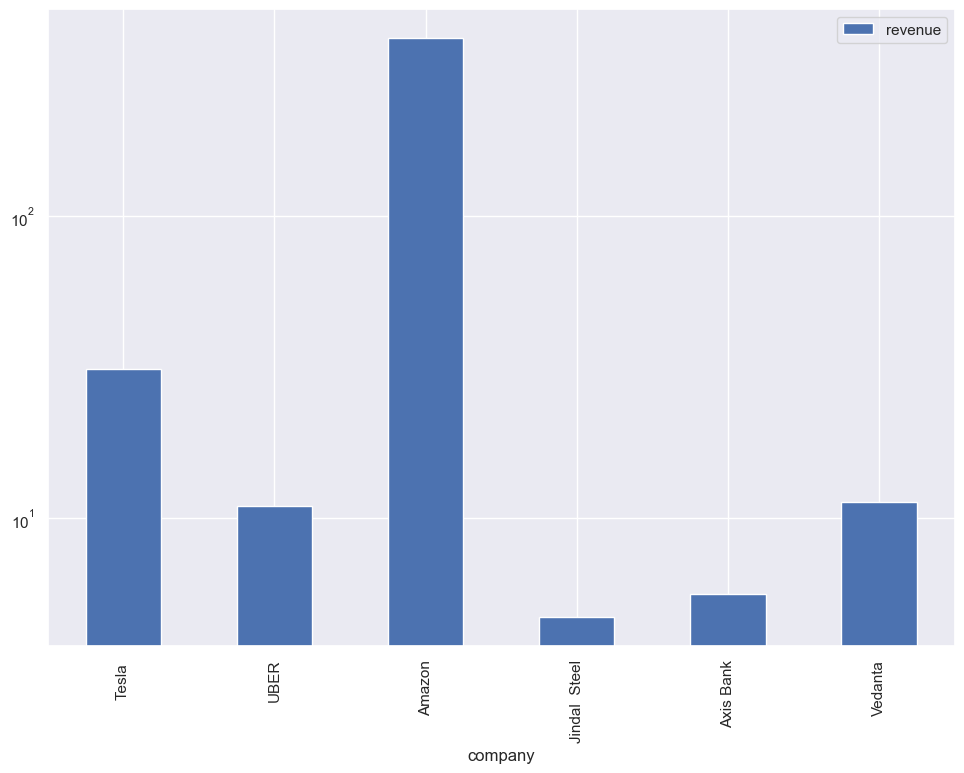

In [299]:
df.plot(kind='bar', x='company', y='revenue', logy=True)
pylot.show()

In [300]:
df = pandas.read_csv('./data/income.csv', index_col=None, names=["income", "count"], skiprows=1)
df.head()

,income,count
0,5000,4371
1,10000,3295
2,15000,5825
3,20000,6047
4,25000,6097


C:\Users\User\AppData\Local\Temp\ipykernel_11208\1277255299.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


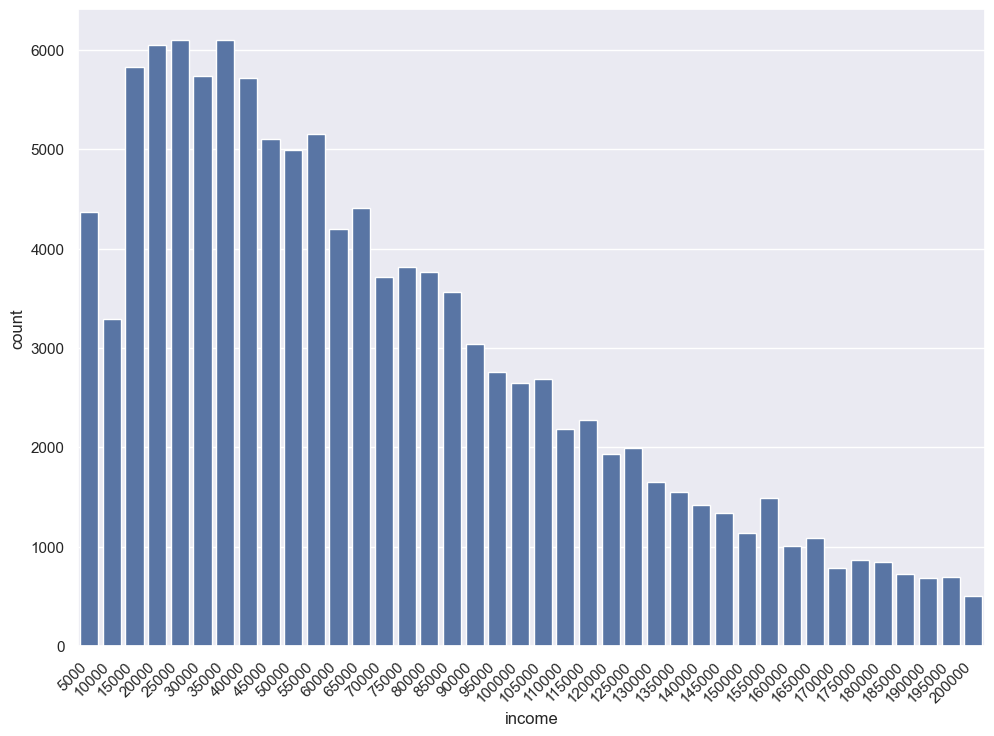

In [301]:
seaborn.set(rc={ 'figure.figsize': (11.7, 8.27) })
g = seaborn.barplot(x='income', y='count', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

pylot.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11208\2576583001.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


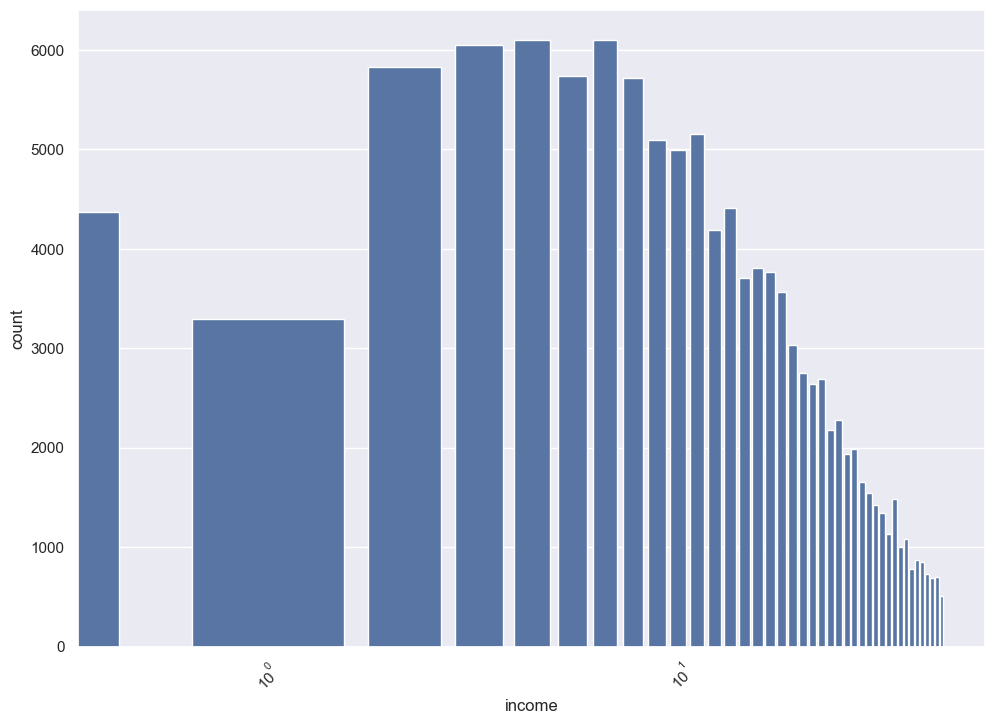

In [302]:
seaborn.set(rc={ 'figure.figsize': (11.7, 8.27) })
g = seaborn.barplot(x='income', y='count', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set(xscale='log')

pylot.show()

In [303]:
df = pandas.DataFrame({
    "Height": [5.2, 4.9, 4.5, 5.5, 7.0, 10.0, 6.2]
})

df

,Height
0,5.2
1,4.9
2,4.5
3,5.5
4,7.0
5,10.0
6,6.2


In [310]:
average = numpy.mean(df["Height"])
std = numpy.std(df["Height"])

print(f"Average: {average}")
print(f"STD: {std}")

df['Z-Score'] = (df["Height"] - average) / std
df

Average: 6.185714285714286
STD: 1.7381669913434437


,Height,Z-Score
0,5.2,-0.567100
1,4.9,-0.739695
2,4.5,-0.969823
3,5.5,-0.394504
4,7.0,0.468474
5,10.0,2.194430
6,6.2,0.008219


In [311]:
average = df["Height"].mean()
std = df["Height"].std()

print(f"Average: {average}")
print(f"STD: {std}")

average + 1 * std

Average: 6.185714285714286
STD: 1.877434926904766


8.063149212619052

In [312]:
zscore = df["Z-Score"]
zcore_more_3 = []

for i in zscore:
    if i > 3:
        zcore_more_3.append(True)
    else:
        zcore_more_3.append(False)

df["Zscore > 3"] = zcore_more_3
df

,Height,Z-Score,Zscore > 3
0,5.2,-0.567100,False
1,4.9,-0.739695,False
2,4.5,-0.969823,False
3,5.5,-0.394504,False
4,7.0,0.468474,False
5,10.0,2.194430,False
6,6.2,0.008219,False


In [334]:
median = df["Height"].median()
median

df["Height - Median Height"] = df["Height"] - median
df

,Height,Z-Score,Zscore > 3,Height - Median Height
0,5.2,-0.567100,False,-0.3
1,4.9,-0.739695,False,-0.6
2,4.5,-0.969823,False,-1.0
3,5.5,-0.394504,False,0.0
4,7.0,0.468474,False,1.5
5,10.0,2.194430,False,4.5
6,6.2,0.008219,False,0.7


In [354]:
median = df["Height"].median()
MAD = numpy.round(numpy.sum(df["Height - Median Height"]) / df["Height - Median Height"].size, 1)

print(f"Median: {median}")
print(f"MAD: {MAD}")

Median: 5.5
MAD: 0.7


In [355]:
mod_z_score = 0.6745

In [363]:
df = df.rename(columns={
    "Zscore > 3": "Z-Score > 3"
})

df["Mod Z-Score"] = numpy.round(mod_z_score * (df["Height"] - median) / MAD, 1)
df

,Height,Z-Score,Z-Score > 3,Height - Median Height,Mod Z-Score
0,5.2,-0.567100,False,-0.3,-0.3
1,4.9,-0.739695,False,-0.6,-0.6
2,4.5,-0.969823,False,-1.0,-1.0
3,5.5,-0.394504,False,0.0,0.0
4,7.0,0.468474,False,1.5,1.4
5,10.0,2.194430,False,4.5,4.3
6,6.2,0.008219,False,0.7,0.7


In [366]:
df["Mod Z-Score > 3.5"] = numpy.where(df["Mod Z-Score"] > 3.5, True, False)
df

,Height,Z-Score,Z-Score > 3,Height - Median Height,Mod Z-Score,Mod Z-Score > 3.5
0,5.2,-0.567100,False,-0.3,-0.3,False
1,4.9,-0.739695,False,-0.6,-0.6,False
2,4.5,-0.969823,False,-1.0,-1.0,False
3,5.5,-0.394504,False,0.0,0.0,False
4,7.0,0.468474,False,1.5,1.4,False
5,10.0,2.194430,False,4.5,4.3,True
6,6.2,0.008219,False,0.7,0.7,False


In [370]:
df_no_outlier = df[df["Mod Z-Score > 3.5"] != True]
df_no_outlier

,Height,Z-Score,Z-Score > 3,Height - Median Height,Mod Z-Score,Mod Z-Score > 3.5
0,5.2,-0.567100,False,-0.3,-0.3,False
1,4.9,-0.739695,False,-0.6,-0.6,False
2,4.5,-0.969823,False,-1.0,-1.0,False
3,5.5,-0.394504,False,0.0,0.0,False
4,7.0,0.468474,False,1.5,1.4,False
6,6.2,0.008219,False,0.7,0.7,False


Project

In [375]:
df = pandas.read_csv('./data/movie_revenues.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,54000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.youmeanddupree.com/,1819,"[{""id"": 1253, ""name"": ""roommate""}, {""id"": 2038...",en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/14/2006,130431368,108,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Two's company. Dupree's a crowd.,"You, Me and Dupree",5.4,407
2,21000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,2575,"[{""id"": 246, ""name"": ""dancing""}, {""id"": 470, ""...",en,The Tailor of Panama,A British spy is banished to Panama after havi...,7.047975,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""IE"", ""name"": ""Ireland""}, {""is...",2/11/2001,28008462,109,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"In a place this treacherous, what a good spy n...",The Tailor of Panama,6.2,92
3,1000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,26791,[],en,Brigham City,Wes Clayton is a lawman and a bishop in a Morm...,0.280083,"[{""name"": ""Main Street Movie Company"", ""id"": 6...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/30/2001,852206,119,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Brigham City,7.3,4
4,100000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",NaN,644,"[{""id"": 310, ""name"": ""artificial intelligence""...",en,A.I. Artificial Intelligence,"A robotic boy, the first programmed to love, D...",34.035114,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",6/29/2001,235926552,146,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,David is 11 years old. He weighs 60 pounds. He...,A.I. Artificial Intelligence,6.8,1974


In [382]:
df["revenue"].describe()

count    4.600000e+01
mean     1.879289e+08
std      4.551144e+08
min      8.522060e+05
25%      2.866957e+07
50%      8.381714e+07
75%      1.382135e+08
max      2.787965e+09
Name: revenue, dtype: float64

In [383]:
df["revenue_mln"] = df["revenue"].apply(lambda x: x / 1000000) 
df["revenue_mln"].describe()

count      46.000000
mean      187.928898
std       455.114423
min         0.852206
25%        28.669569
50%        83.817142
75%       138.213502
max      2787.965087
Name: revenue_mln, dtype: float64

In [385]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,12/10/2009,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087
1,54000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.youmeanddupree.com/,1819,"[{""id"": 1253, ""name"": ""roommate""}, {""id"": 2038...",en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,7/14/2006,130431368,108,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Two's company. Dupree's a crowd.,"You, Me and Dupree",5.4,407,130.431368
2,21000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,2575,"[{""id"": 246, ""name"": ""dancing""}, {""id"": 470, ""...",en,The Tailor of Panama,A British spy is banished to Panama after havi...,7.047975,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2/11/2001,28008462,109,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"In a place this treacherous, what a good spy n...",The Tailor of Panama,6.2,92,28.008462
3,1000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,26791,[],en,Brigham City,Wes Clayton is a lawman and a bishop in a Morm...,0.280083,"[{""name"": ""Main Street Movie Company"", ""id"": 6...",...,3/30/2001,852206,119,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Brigham City,7.3,4,0.852206
4,100000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",NaN,644,"[{""id"": 310, ""name"": ""artificial intelligence""...",en,A.I. Artificial Intelligence,"A robotic boy, the first programmed to love, D...",34.035114,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...",...,6/29/2001,235926552,146,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,David is 11 years old. He weighs 60 pounds. He...,A.I. Artificial Intelligence,6.8,1974,235.926552


In [395]:
_, mean, std, *_ = df["revenue_mln"].describe()
df["revenue_mln"].describe()

count      46.000000
mean      187.928898
std       455.114423
min         0.852206
25%        28.669569
50%        83.817142
75%       138.213502
max      2787.965087
Name: revenue_mln, dtype: float64

In [397]:
print(f"Mean: {mean}")
print(f"STD: {std}")

Mean: 187.92889841304347
STD: 455.1144234195408


In [399]:
def get_z_score(value, mean, std):
    return (value - mean) / std

In [404]:
df["Z-Score"] = df["revenue_mln"].apply(lambda x: get_z_score(x, mean, std))
df[["revenue", "Z-Score"]].head()

,revenue,Z-Score
0,2787965087,5.712929
1,130431368,-0.126336
2,28008462,-0.351385
3,852206,-0.411054
4,235926552,0.105463


In [413]:
df[df["Z-Score"] > 3]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,Z-Score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,5.712929


In [414]:
def get_mad(s):
    median = numpy.median(s)
    diff = abs(s - median)
    MAD = numpy.median(diff)
    return MAD

In [416]:
MAD = get_mad(df["revenue_mln"])
median = numpy.median(df["revenue_mln"])
MAD, median

(56.399542499999995, 83.8171415)

In [417]:
def get_modified_z_score(x, median , MAD):
    return 0.6745 * (x - median) / MAD

In [420]:
get_modified_z_score(2787, median, MAD)

32.32822035849404

In [423]:
df["mod_z_score"] = df["revenue_mln"].apply(lambda x: get_modified_z_score(x, median, MAD))
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,Z-Score,mod_z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,5.712929,32.339762
1,54000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.youmeanddupree.com/,1819,"[{""id"": 1253, ""name"": ""roommate""}, {""id"": 2038...",en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,108,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Two's company. Dupree's a crowd.,"You, Me and Dupree",5.4,407,130.431368,-0.126336,0.557474
2,21000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,2575,"[{""id"": 246, ""name"": ""dancing""}, {""id"": 470, ""...",en,The Tailor of Panama,A British spy is banished to Panama after havi...,7.047975,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,109,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"In a place this treacherous, what a good spy n...",The Tailor of Panama,6.2,92,28.008462,-0.351385,-0.667434


In [425]:
df[df["mod_z_score"] > 3.5]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,Z-Score,mod_z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,5.712929,32.339762
7,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,124,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,1513.528810,2.912674,17.098375
12,25000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,619,"[{""id"": 1156, ""name"": ""sister sister relations...",en,The Bodyguard,A former Secret Service agent grudgingly takes...,26.576385,"[{""name"": ""Tig Productions"", ""id"": 335}, {""nam...",...,129,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never let her out of your sight. Never let you...,The Bodyguard,6.1,661,411.006740,0.490158,3.912964
